In [61]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [62]:
taxi = pd.read_csv('nyc_taxi_trip_duration.csv')
taxi.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [63]:
taxi.shape

(729322, 11)

In [64]:
taxi.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [65]:
taxi.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [66]:
taxi.vendor_id.value_counts()

2    390481
1    338841
Name: vendor_id, dtype: int64

In [67]:
taxi.store_and_fwd_flag.value_counts()

N    725282
Y      4040
Name: store_and_fwd_flag, dtype: int64

* **vendor_id** represents different vendor and should be converted to **category**
* **store_and_fwd_flag** represents different category of trip records and should be converted to **category**

In [68]:
taxi['vendor_id'] = taxi['vendor_id'].astype('category')
taxi['store_and_fwd_flag'] = taxi['store_and_fwd_flag'].astype('category')

In [69]:
taxi.dtypes

id                      object
vendor_id             category
pickup_datetime         object
dropoff_datetime        object
passenger_count          int64
pickup_longitude       float64
pickup_latitude        float64
dropoff_longitude      float64
dropoff_latitude       float64
store_and_fwd_flag    category
trip_duration            int64
dtype: object

* **pickup_datetime** and **dropoff_datetime** represents date and time of trip and should be converted to **datetime**

In [70]:
date = pd.DatetimeIndex(taxi['pickup_datetime'])
taxi['pickup_dow'] = date.dayofweek
taxi['pickup_hour'] = date.hour
taxi['pickup_qoy'] = date.quarter

In [71]:
taxi.dtypes

id                      object
vendor_id             category
pickup_datetime         object
dropoff_datetime        object
passenger_count          int64
pickup_longitude       float64
pickup_latitude        float64
dropoff_longitude      float64
dropoff_latitude       float64
store_and_fwd_flag    category
trip_duration            int64
pickup_dow               int64
pickup_hour              int64
pickup_qoy               int64
dtype: object

* **pickup_dow**, **pickup_hour** and **pickup_qoy** represents day of week, hour of day and quarter of year respectively. This should be converted to category.
* Since we have trip duration data available, there is no requirement for **dropoff_datetime**. Also **pickup_datetime** can be dropped from dataset now.

In [72]:
taxi['pickup_dow'] = taxi['pickup_dow'].astype('category')
taxi['pickup_hour'] = taxi['pickup_hour'].astype('category')
taxi['pickup_qoy'] = taxi['pickup_qoy'].astype('category')

taxi = taxi.drop(columns = ['pickup_datetime', 'dropoff_datetime'])

In [73]:
taxi.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_dow,pickup_hour,pickup_qoy
0,id1080784,2,1,-73.953918,40.778873,-73.963875,40.771164,N,400,0,16,1
1,id0889885,1,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,4,23,1
2,id0857912,2,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,6,17,1
3,id3744273,2,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,1,9,1
4,id0232939,1,1,-74.017120,40.708469,-73.988182,40.740631,N,848,2,6,1


In [74]:
taxi.dtypes

id                      object
vendor_id             category
passenger_count          int64
pickup_longitude       float64
pickup_latitude        float64
dropoff_longitude      float64
dropoff_latitude       float64
store_and_fwd_flag    category
trip_duration            int64
pickup_dow            category
pickup_hour           category
pickup_qoy            category
dtype: object

## Univariate analysis : Numerical Variables

In [75]:
#selecting numerical datatypes
taxi.select_dtypes(include=['int64', 'float64']).dtypes

passenger_count        int64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
trip_duration          int64
dtype: object

In [76]:
## segregating into groups
location = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
passenger = ['passenger_count']
duration = ['trip_duration']

In [77]:
#function for univariate analysis

def uva_numeric(data, group):
    size = len(group)
    plt.figure(figsize = (7*size, 3), dpi = 100)
    
    for j,i in enumerate(group):
        mini = data[i].min()
        maxi = data[i].max()
        ran = data[i].max()-data[i].min()
        mean = data[i].mean()
        median = data[i].median()
        st_dev = data[i].std()
        skew = data[i].skew()
        kurt = data[i].kurtosis()
        
        #st-dev points
        points = mean-st_dev, mean+st_dev
        
        #plot
        plt.subplot(1,size,j+1)
        sns.kdeplot(data[i], shade = True)
        sns.lineplot(points, [0,0], label = 'std_dev', color = 'black')
        sns.scatterplot([mini, maxi], [0,0], color = 'orange', label = 'min/max')
        sns.scatterplot([mean], [0], color = 'red', label = "mean")
        sns.scatterplot([median], [0], color = 'blue', label = "median")
        plt.xlabel(i, fontsize = 20)
        plt.ylabel('density')
        plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))
    plt.show()
        
        

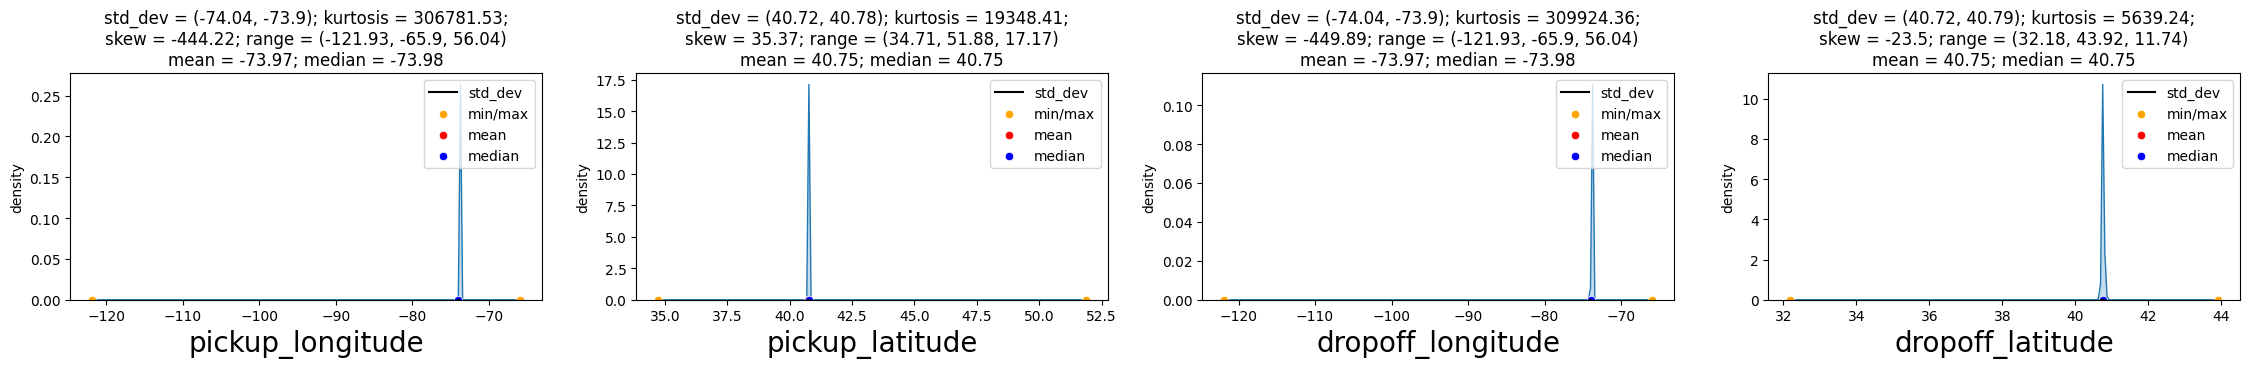

In [78]:
uva_numeric(taxi,location)

* From the plot we can infer that most of the pickup and drop locations are closer except few outliers.

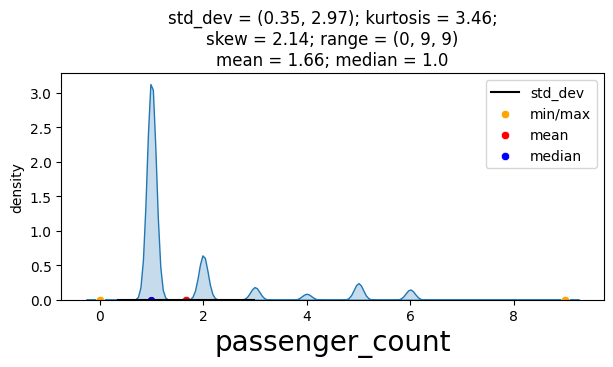

In [79]:
uva_numeric(taxi,passenger)

* Most of the cab trips have single passenger as rider

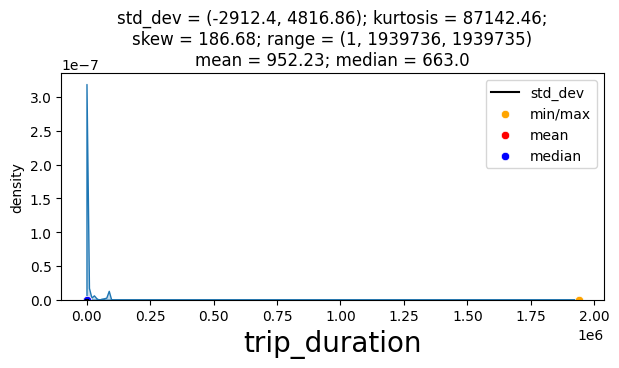

In [80]:
uva_numeric(taxi, duration)

In [81]:
taxi['trip_duration'].describe()

count    7.293220e+05
mean     9.522291e+02
std      3.864626e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.630000e+02
75%      1.075000e+03
max      1.939736e+06
Name: trip_duration, dtype: float64

* Lets remove outliers from duration variables **(not considering values > 3 standard deviation)**

In [82]:
factor = 1
dur_data = taxi[duration]

dur_data = dur_data[dur_data['trip_duration'] < factor*dur_data['trip_duration'].std()]

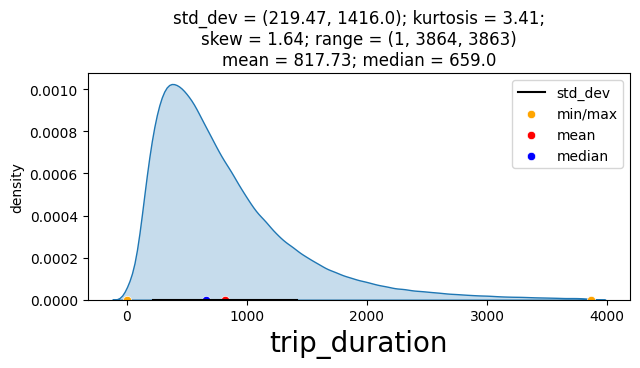

In [83]:
uva_numeric(dur_data,duration)

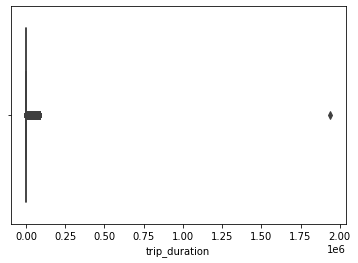

In [84]:
sns.boxplot(taxi['trip_duration'])
plt.show()

In [85]:

taxi['trip_duration'].sort_values(ascending=False).values

array([1939736,   86391,   86387, ...,       1,       1,       1])

In [86]:
highest_duration = taxi['trip_duration'].sort_values(ascending=False).values[0]
sec_high_duration = taxi['trip_duration'].sort_values(ascending=False).values[1]

# replacing outlier with second highest value

taxi['trip_duration'][taxi['trip_duration'] == highest_duration] = sec_high_duration

In [87]:
taxi['trip_duration'].sort_values(ascending=False).values

array([86391, 86391, 86387, ...,     1,     1,     1])

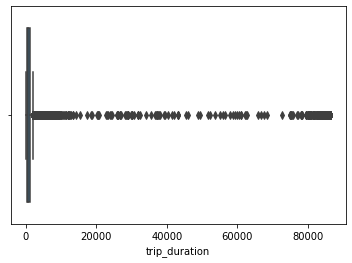

In [88]:
sns.boxplot(taxi['trip_duration'])
plt.show()

* Most trip durations are in the range of (200 - 1400) seconds. Except one outlier which we have changed to second highest value
* things to investigate further - Did passenger travelling alone have trip duration within the above range?

## Univariate analysis - Categorical Variables

In [89]:
# function for univariate analysis

def uva_categorical(data, group):
    size = len(group)
    plt.figure(figsize = (7*size, 3), dpi = 100)
    
    for j,i in enumerate(group):
        norm_data = data[i].value_counts(normalize = True)
        n_uni = data[i].nunique()
        
        plt.subplot(1,size,j+1)
        sns.barplot(norm_data, norm_data.index, order = norm_data.index)
        plt.ylabel(i, fontsize = 20)
        plt.xlabel('Density')
        plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_data))

In [90]:
# segregating into groups
time = ['pickup_dow', 'pickup_hour', 'pickup_qoy']
flag = ['store_and_fwd_flag']

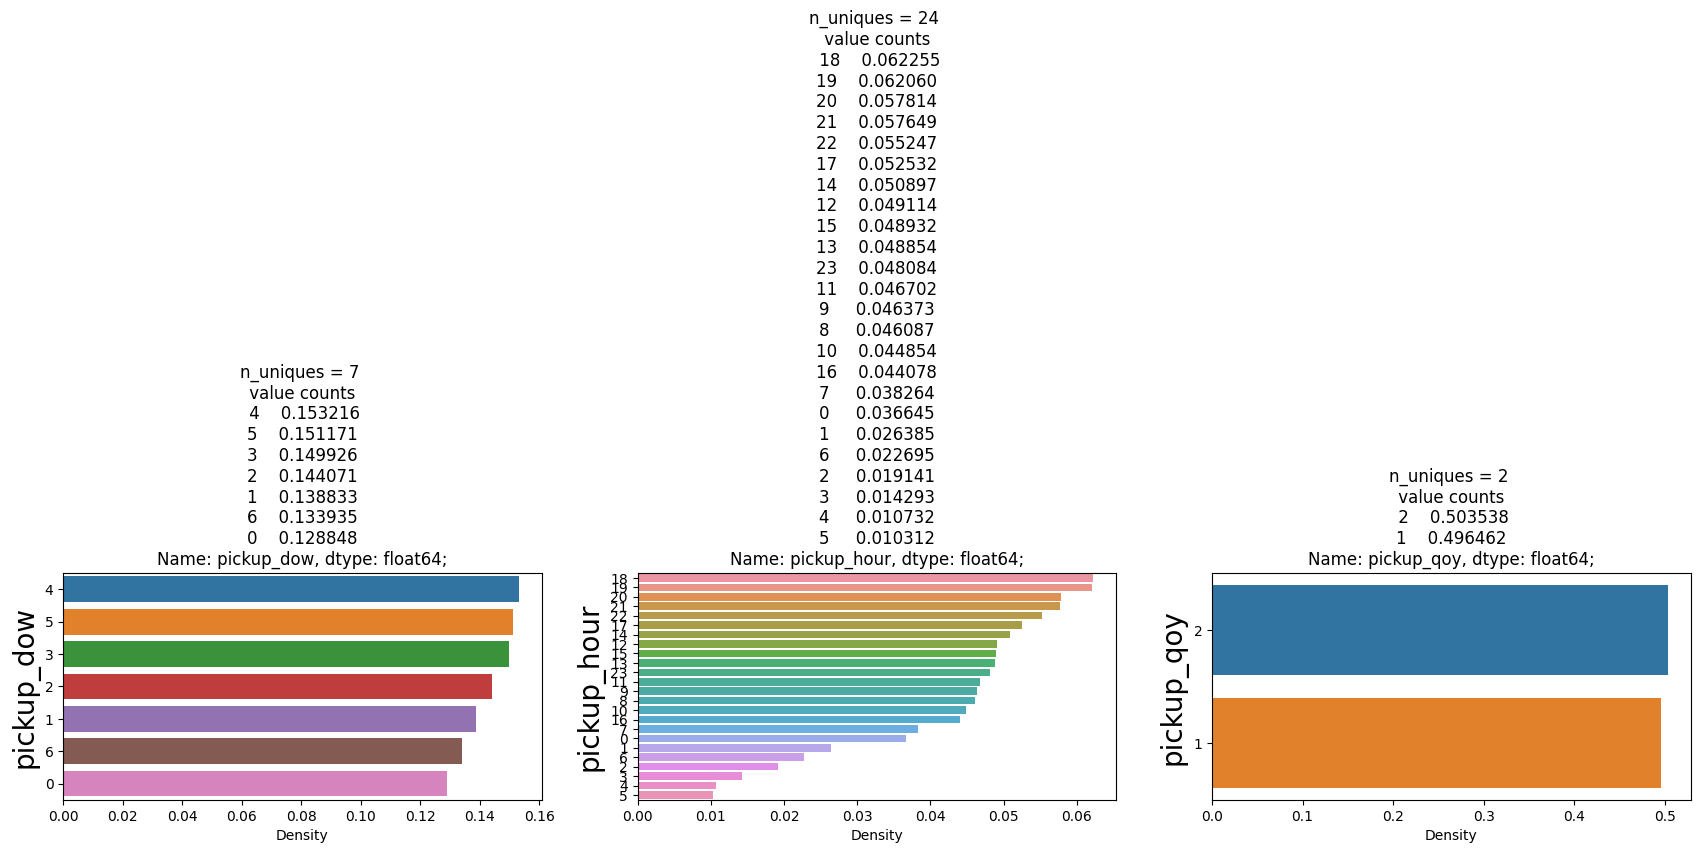

In [91]:
uva_categorical(taxi, time)

In [92]:
taxi.pickup_qoy.value_counts()

2    367241
1    362081
Name: pickup_qoy, dtype: int64

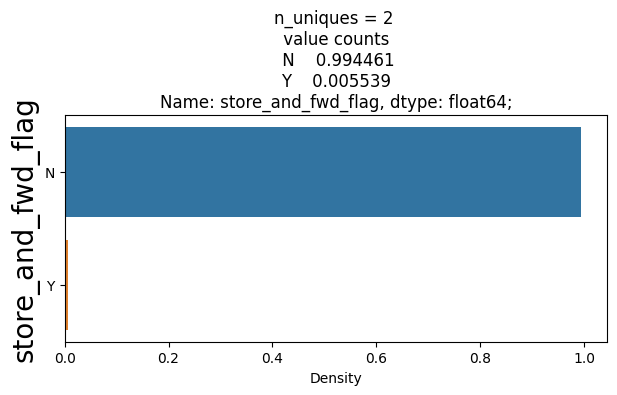

In [93]:
uva_categorical(taxi, flag)

In [94]:
taxi['trip_duration'].loc[taxi['store_and_fwd_flag'] == 'Y'].describe()

count    4040.000000
mean     1094.857921
std       942.280647
min         2.000000
25%       460.750000
50%       825.000000
75%      1397.750000
max      7824.000000
Name: trip_duration, dtype: float64

In [95]:
taxi['trip_duration'].loc[taxi['store_and_fwd_flag'] == 'N'].describe()

count    725282.000000
mean        948.879312
std        3137.015800
min           1.000000
25%         397.000000
50%         662.000000
75%        1074.000000
max       86391.000000
Name: trip_duration, dtype: float64

* **store_and_fwd_flag** can be dropped as only 0.05 per data have 'Y' flag.

## Bivariate Analysis : Numerical - Numerical

In [96]:
##columns with numerical values
num_cols = taxi.select_dtypes(include=['int64', 'float64'])
num_cols

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
0,1,-73.953918,40.778873,-73.963875,40.771164,400
1,2,-73.988312,40.731743,-73.994751,40.694931,1100
2,2,-73.997314,40.721458,-73.948029,40.774918,1635
3,6,-73.961670,40.759720,-73.956779,40.780628,1141
4,1,-74.017120,40.708469,-73.988182,40.740631,848
...,...,...,...,...,...,...
729317,2,-73.965919,40.789780,-73.952637,40.789181,296
729318,1,-73.996666,40.737434,-74.001320,40.731911,315
729319,1,-73.997849,40.761696,-74.001488,40.741207,673
729320,1,-74.006706,40.708244,-74.013550,40.713814,447


In [97]:
#Finding correlation for data
taxi_corr = num_cols.corr()
taxi_corr

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
passenger_count,1.000000,0.001163,-0.004696,-0.000027,-0.003944,0.016492
pickup_longitude,0.001163,1.000000,0.047635,0.780647,0.118473,0.041639
pickup_latitude,-0.004696,0.047635,1.000000,0.119970,0.479352,-0.044538
dropoff_longitude,-0.000027,0.780647,0.119970,1.000000,0.149598,0.025327
dropoff_latitude,-0.003944,0.118473,0.479352,0.149598,1.000000,-0.035411
trip_duration,0.016492,0.041639,-0.044538,0.025327,-0.035411,1.000000


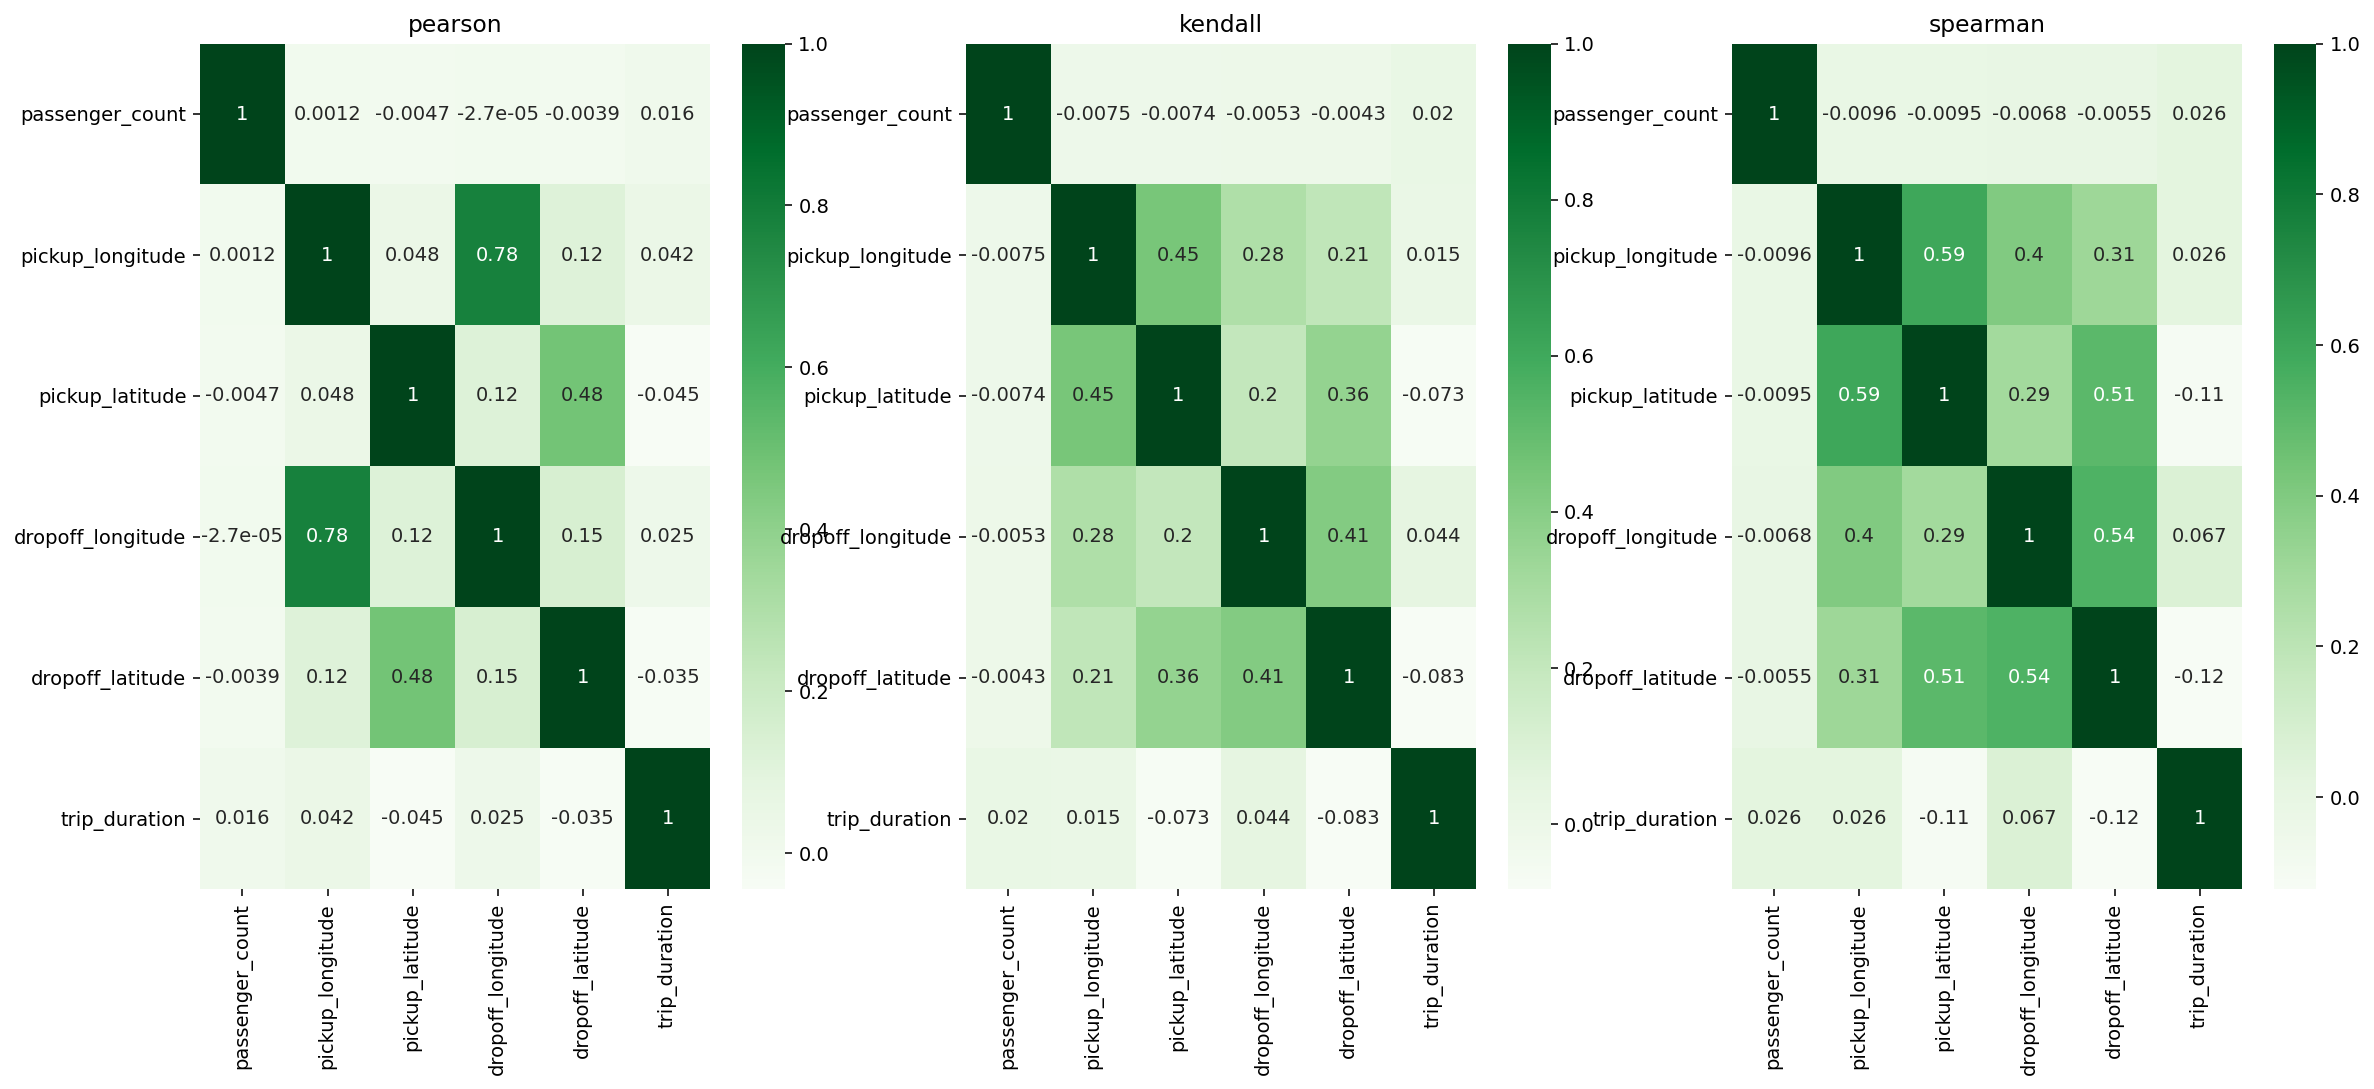

In [98]:
plt.figure(figsize=(20,8), dpi =140)

for j,i in enumerate(['pearson', 'kendall', 'spearman']):
    plt.subplot(1,3,j+1)
    taxi_corr = num_cols.corr(method = i)
    sns.heatmap(taxi_corr, cmap = 'Greens', annot = True)
    plt.title(i)


* There is a high correlation between **pickup_longitude** and **dropoff_longitude** as shown in pearson graph. This indicates that most of the rides fare from north-south direction than east-west direction.

* Does passenger counts influences the duration of trip?

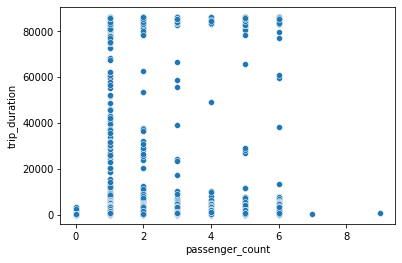

In [99]:
sns.scatterplot(taxi['passenger_count'], taxi['trip_duration'])
plt.show()

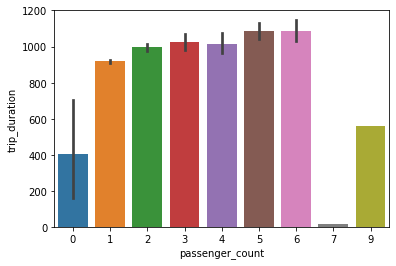

In [100]:
sns.barplot(x = 'passenger_count', y = 'trip_duration', data = taxi)
plt.show()

* Passengers travelling in group either take long trip or short trip. Average time of trip duration increases with passenger count.

In [101]:
taxi.dtypes

id                      object
vendor_id             category
passenger_count          int64
pickup_longitude       float64
pickup_latitude        float64
dropoff_longitude      float64
dropoff_latitude       float64
store_and_fwd_flag    category
trip_duration            int64
pickup_dow            category
pickup_hour           category
pickup_qoy            category
dtype: object

## Bivariate Analysis: Numerical - Categorical

* Does vendor types determines the trip duration

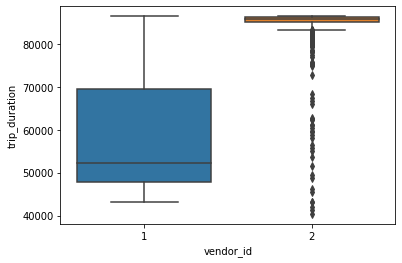

In [116]:
sns.boxplot(x = 'vendor_id', y = 'trip_duration', data = taxi[(taxi['trip_duration'] > 40000)])
plt.show()

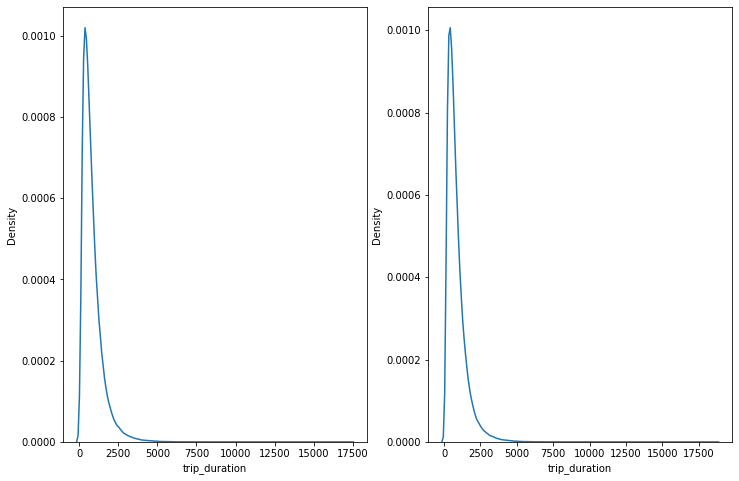

In [112]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.kdeplot(data = taxi[(taxi['vendor_id'] == 1) & (taxi['trip_duration'] < 20000)], x = 'trip_duration')
plt.subplot(1,2,2)
sns.kdeplot(data = taxi[(taxi['vendor_id'] == 2) & (taxi['trip_duration'] < 20000)], x = 'trip_duration')
plt.show()

* It seems that both passengers doesnt distinguish between vendors to take short rides. Vendor 2 has slight preference among passengers while taking rides for long duration

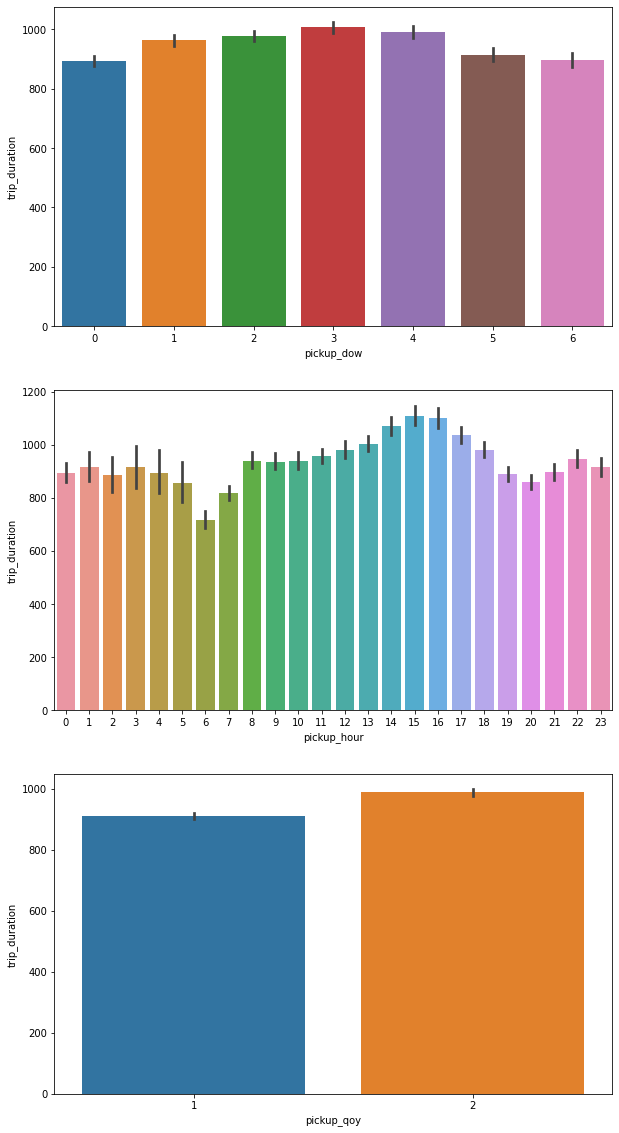

In [122]:
# Analysis between days, months and quarter with trip duration

time_category = ['pickup_dow', 'pickup_hour', 'pickup_qoy']
size = len(time_category)
plt.figure(figsize=(10,20))
for j,i in enumerate(time_category):
    plt.subplot(size,1,j+1)
    sns.barplot(data = taxi, x = i, y = 'trip_duration')
    
plt.show()
    
    

* trip_duration mean is more during weekdays, suggesting traffic will be more during weekdays.
* During evening hours pickup, trip durations are higher. This can be due to higher congestion in traffic during evening. Also lesser average time during early morning suggests the same.
* In Quarter 2, the average time is more. Will have to look into weather condition in this quarter. Rainy or foggy weather will lead to longer trip duration.

## Multivariate Analysis

In [128]:
taxi.dtypes

id                      object
vendor_id             category
passenger_count          int64
pickup_longitude       float64
pickup_latitude        float64
dropoff_longitude      float64
dropoff_latitude       float64
store_and_fwd_flag    category
trip_duration            int64
pickup_dow            category
pickup_hour           category
pickup_qoy            category
dtype: object

### Vendor, passenger count, pickup day with trip duration

In [130]:
pd.pivot_table(data = taxi, index = ['vendor_id', 'passenger_count'], columns = 'pickup_dow', values = 'trip_duration')

pickup_dow                           0            1            2            3  \
vendor_id passenger_count                                                       
1         0                1386.750000          NaN   981.000000    63.500000   
          1                 776.951054   827.826263   849.371142   859.946307   
          2                 929.969541   969.660103  1014.365911  1023.967230   
          3                 938.686777   947.731200  1025.407225  1045.003729   
          4                1003.739269  1044.356863  1106.715517  1124.009917   
          5                 667.600000   990.666667   701.625000  1289.074074   
          6                 902.214286   982.166667  1290.375000  1250.222222   
2         0                   1.000000     4.000000  1556.000000     7.000000   
          1                 951.331056  1043.152997  1078.611977  1103.692788   
          2                 958.164591  1089.459084  1062.070788  1052.870699   
          3                 952.922629  1056.211989  1074.300775  1297.844976   
          4                1070.500474   962.943649   949.384034  1121.810720   
          5                1055.565986  1019.548726  1028.891261  1167.450157   
          6                1055.527473  1249.564284  1007.134346  1063.458761   
          7                        NaN    19.000000          NaN          NaN   
          9                        NaN          NaN          NaN          NaN   

pickup_dow                           4            5            6  
vendor_id passenger_count                                         
1         0                 535.200000  1075.000000     8.400000  
          1                 837.889707   746.369461   732.533045  
          2                 973.893860   851.921699   823.661160  
          3                 956.556845   878.463698   838.580048  
          4                1014.925845   880.454722   842.891267  
          5                1300.225806   689.065217   753.093750  
          6                1334.909091  1023.937500  1141.142857  
2         0                   4.000000    30.333333    27.600000  
          1                1078.549095  1016.042598  1011.858296  
          2                1136.795216   995.162818  1025.098647  
          3                1121.111752  1171.813830   889.129220  
          4                1200.141827   977.370340  1043.119114  
          5                1152.770263  1127.161188  1033.979867  
          6                1099.580610  1055.189374  1055.389731  
          7                        NaN          NaN          NaN  
          9                 560.000000          NaN          NaN

* passengers travelling alone have less average trip duration.
* passengers travelling in a high averages during weekdays. This might indicate people travelling to work are car pooling.